In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df= pd.read_csv("extended_data.csv")
df

,model_year,brand,model,type,miles_per_gallon,premium_version,msrp,collection_car
0,2016,Toyota,Land Cruiser Base,SUV,13.0,1,84900.0,0
1,2014,RAM,ProMaster 2500 Window Van High Roof,Van,15.0,0,35000.0,0
2,2002,Ford,Mustang GT,Coupe,16.0,0,26250.0,0
3,2012,BMW,428 Gran Coupe i xDrive,Sedan,27.0,1,45000.0,0
4,2008,Mercedes-Benz,SL-Class SL500 Roadster,Convertible,18.0,1,100000.0,1
...,...,...,...,...,...,...,...,...
28138,2017,Bentley,Huracan LP580-2S,Coupe,21.0,1,200000.0,1
28139,2001,Mazda,RX-8 Sport,Coupe,18.0,0,25000.0,0
28140,2018,Ford,Model X P100D,SUV,94.0,1,199000.0,1
28141,2022,Land,Rover Range Rover Velar P380 SE R-Dynamic,SUV,20.0,1,63700.0,0


In [4]:
df.shape

(28143, 8)

In [5]:
df.columns

Index(['model_year', 'brand', 'model', 'type', 'miles_per_gallon',
       'premium_version', 'msrp', 'collection_car'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28143 entries, 0 to 28142
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   model_year        28143 non-null  int64  
 1   brand             28143 non-null  object 
 2   model             28143 non-null  object 
 3   type              28143 non-null  object 
 4   miles_per_gallon  28126 non-null  float64
 5   premium_version   28143 non-null  int64  
 6   msrp              28126 non-null  float64
 7   collection_car    28143 non-null  int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 1.7+ MB


In [7]:
df.describe()

,model_year,miles_per_gallon,premium_version,msrp,collection_car
count,28143.000000,28126.000000,28143.000000,2.812600e+04,28143.000000
mean,2013.456774,21.769242,0.533525,5.736535e+04,0.137299
std,6.847536,13.472177,0.498884,6.146327e+04,0.344169
min,1974.000000,-1.000000,0.000000,0.000000e+00,0.000000
25%,2009.000000,17.000000,0.000000,3.000000e+04,0.000000
50%,2015.000000,20.000000,1.000000,4.120000e+04,0.000000
75%,2019.000000,24.000000,1.000000,6.400000e+04,0.000000
max,2024.000000,234.000000,1.000000,2.500000e+06,1.000000


In [8]:
df[df.duplicated()]

,model_year,brand,model,type,miles_per_gallon,premium_version,msrp,collection_car


In [9]:
df.nunique()

model_year            36
brand                 57
model               1898
type                   9
miles_per_gallon     121
premium_version        2
msrp                2950
collection_car         2
dtype: int64

In [10]:
df.isnull().sum()

model_year           0
brand                0
model                0
type                 0
miles_per_gallon    17
premium_version      0
msrp                17
collection_car       0
dtype: int64

In [11]:
df['miles_per_gallon'].mean()

21.769241982507285

In [12]:
# we fill null values of miles_per_gallon column
df['miles_per_gallon']= df['miles_per_gallon'].fillna(df['miles_per_gallon'].mean())

In [13]:
df.isnull().sum()

model_year           0
brand                0
model                0
type                 0
miles_per_gallon     0
premium_version      0
msrp                17
collection_car       0
dtype: int64

In [14]:
df['msrp']= df['msrp'].fillna(df['msrp'].mean())

In [15]:
df.isnull().sum()

model_year          0
brand               0
model               0
type                0
miles_per_gallon    0
premium_version     0
msrp                0
collection_car      0
dtype: int64

In [16]:
df= df.drop('model', axis=1)

In [17]:
df.columns

Index(['model_year', 'brand', 'type', 'miles_per_gallon', 'premium_version',
       'msrp', 'collection_car'],
      dtype='object')

In [18]:
#make two variable for categorical and numerical column
cat=[]
num=[]
for i in df.columns:
  if df[i].nunique()<=100:
    cat.append(i)
  else:
    num.append(i)

In [19]:
cat

['model_year', 'brand', 'type', 'premium_version', 'collection_car']

In [20]:
num

['miles_per_gallon', 'msrp']

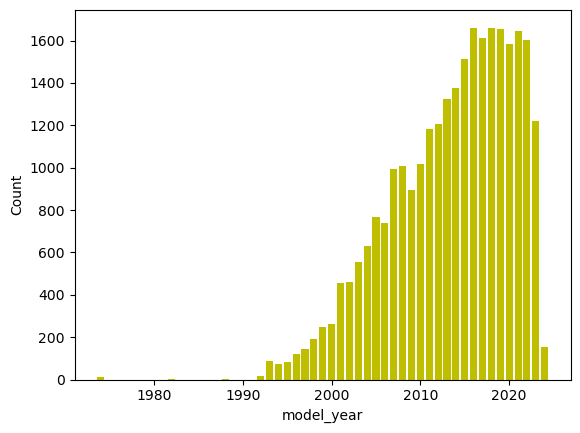

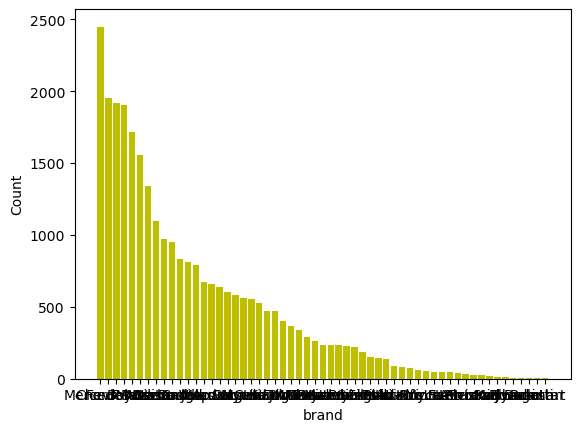

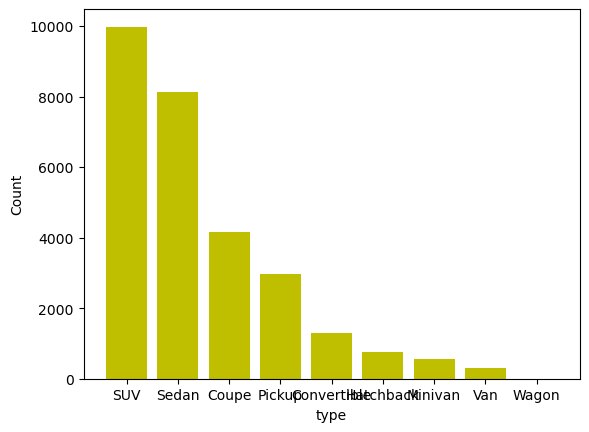

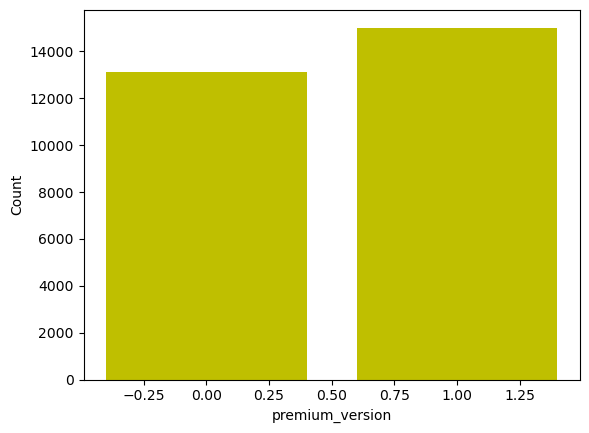

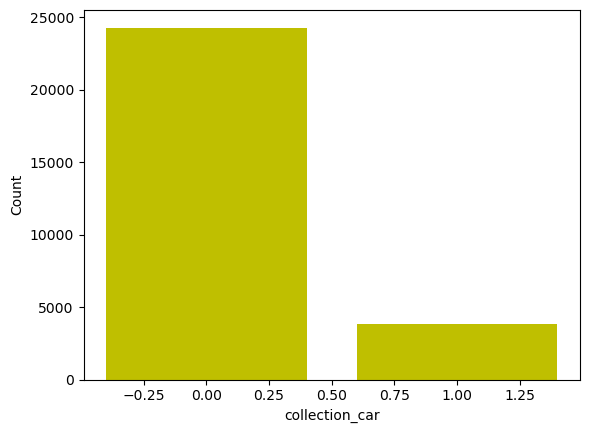

In [21]:
for i in cat:
    vc = df[i].value_counts()
    plt.bar(vc.index, height=vc, color='y')
    plt.xlabel(i)
    plt.ylabel('Count')
    plt.show()

In [22]:
vc.index  #category wise index

Index([0, 1], dtype='int64', name='collection_car')

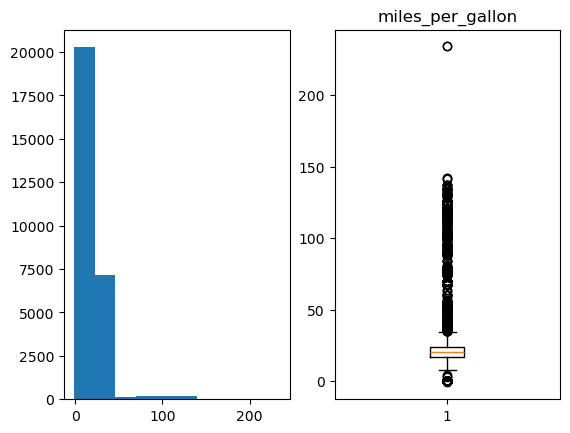

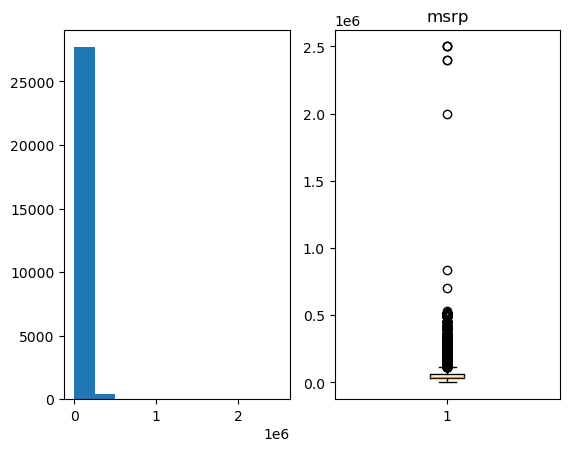

In [23]:
for i in num:
    fig, ax=plt.subplots(1,2)
    ax[0].hist(df[i])
    ax[1].boxplot(df[i])
    plt.title(i)
    plt.show()

In [24]:
df.brand.unique()

array(['Toyota', 'RAM', 'Ford', 'BMW', 'Mercedes-Benz', 'Lexus',
       'Chevrolet', 'Audi', 'Porsche', 'Genesis', 'Hummer', 'Mazda',
       'Land', 'Honda', 'Jeep', 'Jaguar', 'Lincoln', 'Nissan', 'Saturn',
       'Cadillac', 'Kia', 'Maserati', 'Volkswagen', 'Dodge', 'Subaru',
       'Chrysler', 'Hyundai', 'Mitsubishi', 'INFINITI', 'Tesla',
       'Lamborghini', 'GMC', 'MINI', 'Acura', 'Buick', 'Rivian',
       'Pontiac', 'Alfa', 'Mercury', 'Volvo', 'Rolls-Royce', 'McLaren',
       'Bentley', 'Aston', 'FIAT', 'Scion', 'Ferrari', 'Lucid', 'Saab',
       'Maybach', 'Karma', 'Suzuki', 'Lotus', 'Bugatti', 'Plymouth',
       'smart', 'Polestar'], dtype=object)

In [25]:
df.brand.nunique()

57

In [26]:
df.type.nunique()

9

In [27]:
# OneHotEncoder

from sklearn.preprocessing import OneHotEncoder
ohe= OneHotEncoder(sparse_output= False)
brands=ohe.fit_transform(df[['brand']])#only acceptb df
brands

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [28]:
ohe.categories_

[array(['Acura', 'Alfa', 'Aston', 'Audi', 'BMW', 'Bentley', 'Bugatti',
        'Buick', 'Cadillac', 'Chevrolet', 'Chrysler', 'Dodge', 'FIAT',
        'Ferrari', 'Ford', 'GMC', 'Genesis', 'Honda', 'Hummer', 'Hyundai',
        'INFINITI', 'Jaguar', 'Jeep', 'Karma', 'Kia', 'Lamborghini',
        'Land', 'Lexus', 'Lincoln', 'Lotus', 'Lucid', 'MINI', 'Maserati',
        'Maybach', 'Mazda', 'McLaren', 'Mercedes-Benz', 'Mercury',
        'Mitsubishi', 'Nissan', 'Plymouth', 'Polestar', 'Pontiac',
        'Porsche', 'RAM', 'Rivian', 'Rolls-Royce', 'Saab', 'Saturn',
        'Scion', 'Subaru', 'Suzuki', 'Tesla', 'Toyota', 'Volkswagen',
        'Volvo', 'smart'], dtype=object)]

In [29]:
type(brands)

numpy.ndarray

In [30]:
brands_df=pd.DataFrame(brands,columns=ohe.categories_)
brands_df

,Acura,Alfa,Aston,Audi,BMW,Bentley,Bugatti,Buick,Cadillac,Chevrolet,...,Saab,Saturn,Scion,Subaru,Suzuki,Tesla,Toyota,Volkswagen,Volvo,smart
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28138,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28139,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28140,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28141,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
df=pd.concat([df,brands_df] ,axis=1)
df

,model_year,brand,type,miles_per_gallon,premium_version,msrp,collection_car,"(Acura,)","(Alfa,)","(Aston,)",...,"(Saab,)","(Saturn,)","(Scion,)","(Subaru,)","(Suzuki,)","(Tesla,)","(Toyota,)","(Volkswagen,)","(Volvo,)","(smart,)"
0,2016,Toyota,SUV,13.0,1,84900.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,2014,RAM,Van,15.0,0,35000.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2002,Ford,Coupe,16.0,0,26250.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2012,BMW,Sedan,27.0,1,45000.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2008,Mercedes-Benz,Convertible,18.0,1,100000.0,1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28138,2017,Bentley,Coupe,21.0,1,200000.0,1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28139,2001,Mazda,Coupe,18.0,0,25000.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28140,2018,Ford,SUV,94.0,1,199000.0,1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28141,2022,Land,SUV,20.0,1,63700.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
df['type'].nunique()

9

In [33]:
df['type'].unique()

array(['SUV', 'Van', 'Coupe', 'Sedan', 'Convertible', 'Pickup', 'Minivan',
       'Hatchback', 'Wagon'], dtype=object)

In [34]:
from sklearn.preprocessing import OneHotEncoder
ohe= OneHotEncoder(sparse_output= False)
types=ohe.fit_transform(df[['type']])#only acceptb df
types

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [35]:
type(types)

numpy.ndarray

In [36]:
ohe.categories_

[array(['Convertible', 'Coupe', 'Hatchback', 'Minivan', 'Pickup', 'SUV',
        'Sedan', 'Van', 'Wagon'], dtype=object)]

In [37]:
types_df=pd.DataFrame(types,columns=ohe.categories_)
types_df

,Convertible,Coupe,Hatchback,Minivan,Pickup,SUV,Sedan,Van,Wagon
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
28138,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28139,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28140,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
28141,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [38]:
df=pd.concat([df,types_df] ,axis=1)
df

,model_year,brand,type,miles_per_gallon,premium_version,msrp,collection_car,"(Acura,)","(Alfa,)","(Aston,)",...,"(smart,)","(Convertible,)","(Coupe,)","(Hatchback,)","(Minivan,)","(Pickup,)","(SUV,)","(Sedan,)","(Van,)","(Wagon,)"
0,2016,Toyota,SUV,13.0,1,84900.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,2014,RAM,Van,15.0,0,35000.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,2002,Ford,Coupe,16.0,0,26250.0,0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2012,BMW,Sedan,27.0,1,45000.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,2008,Mercedes-Benz,Convertible,18.0,1,100000.0,1,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28138,2017,Bentley,Coupe,21.0,1,200000.0,1,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28139,2001,Mazda,Coupe,18.0,0,25000.0,0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28140,2018,Ford,SUV,94.0,1,199000.0,1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
28141,2022,Land,SUV,20.0,1,63700.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [39]:
x_df=df.drop(columns=['brand','type','msrp']) #Independent
y=df['msrp'] #Dependent data
x_df

,model_year,miles_per_gallon,premium_version,collection_car,"(Acura,)","(Alfa,)","(Aston,)","(Audi,)","(BMW,)","(Bentley,)",...,"(smart,)","(Convertible,)","(Coupe,)","(Hatchback,)","(Minivan,)","(Pickup,)","(SUV,)","(Sedan,)","(Van,)","(Wagon,)"
0,2016,13.0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,2014,15.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,2002,16.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2012,27.0,1,0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,2008,18.0,1,1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28138,2017,21.0,1,1,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28139,2001,18.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28140,2018,94.0,1,1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
28141,2022,20.0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [40]:
x=x_df.values              # convert dataframe into array
y=y.values

In [41]:
x

array([[2.016e+03, 1.300e+01, 1.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [2.014e+03, 1.500e+01, 0.000e+00, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       [2.002e+03, 1.600e+01, 0.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       ...,
       [2.018e+03, 9.400e+01, 1.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [2.022e+03, 2.000e+01, 1.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [2.020e+03, 2.200e+01, 1.000e+00, ..., 1.000e+00, 0.000e+00,
        0.000e+00]])

In [42]:
y

array([ 84900.,  35000.,  26250., ..., 199000.,  63700.,  83500.])

In [43]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(22514, 70)
(5629, 70)
(22514,)
(5629,)


In [44]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(x_train, y_train)   #relation btw x_train and y_train

LinearRegression()

In [45]:
y_train_pred=lr_model.predict(x_train)

In [46]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [47]:
mse_t=mean_squared_error(y_train_pred,y_train)
rmse_t=mean_squared_error(y_train_pred,y_train)**0.5
mae_t=mean_absolute_error(y_train_pred,y_train)
r2_lin_train = r2_score(y_train, y_train_pred)

print(mse_t)
print(rmse_t)
print(mae_t)
print(r2_lin_train)

999762680.4345026
31619.024027229283
16372.916109576683
0.7384253757512305


In [48]:
y_test_pred=lr_model.predict(x_test)
mse_test=mean_squared_error(y_test_pred,y_test)
rmse_test=mean_squared_error(y_test_pred,y_test)**0.5
mae_test=mean_absolute_error(y_test_pred,y_test)
r2_lin_test = r2_score(y_test, y_test_pred)

print(mse_test)
print(rmse_test)
print(mae_test)
print(r2_lin_test)

1849191679.9813373
43002.22877923117
16998.999664306535
0.48456745442871973


In [49]:
# assumptions of linear regresion

import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.stattools import durbin_watson
from scipy.stats import shapiro, probplot

def test_linear_regression_assumptions(x, y, x_df):
    """ Testss he key assumptions of linear regression: linearity, independence, homoscedasticity, normality of residuals
    and no multicollinearity
    Parameters:
    x(Dataframe) : Independent variables
    y(Series): Dependent variable
    
    Returns:
    None
    """

    # Add constant to x for intercept
    x = sm.add_constant(x)

    #Fit the OLS model
    ols_model =  sm.OLS(y,x).fit()
    residuals = ols_model.resid
    predicted_values = ols_model.fittedvalues

    # 1. Linearity
    print("1. Linearity:\n")
    plt.scatter(predicted_values, residuals, alpha=0.7, edgecolors='k')
    plt.axhline(y=0, color='Red', linestyle='--')
    plt.xlabel("Predicted Values")
    plt.ylabel("Residuals")
    plt.title("esiduals vs Predicted Values")
    plt.show()
    print("Check if the residuals are randomaly scatteres aroubd 0. Non-random patterns indicate non-linearity")

    # 2. No Autocorrelation: Independence of Errors
    print("2. Independence of Errors (Durbin-Waston Test):\n")
    dw_stat = durbin_watson(residuals)
    print(f"Durin-Waston statistic: {dw_stat}")
    if 1.5<=dw_stat<=2.5:
        print("Residuals appear to be independent (No autocorrelation).\n")
    else:
        print("Residuals show autocorrelation. Consider adding lag variables or using GLS.\n")

    # 3. Homoscedasticity
    print("3. Homoscedasticity (Breusch-Pagan Test): \n")
    bp_test = het_breuschpagan(residuals, x)
    print(f"Lagrange Multiplier Staistic: {bp_test[0]}")
    print(f"p-value: {bp_test[1]}")
    if bp_test[1] >0.05:
        print("Residuals have constant variance(Homoscedasticity).\n")
    else:
        print("Residuals do not ave constant variance (Heteroscedasticity). Consider GLS or transformation.\n")

    # 4. Normality of Errors
    print("4. Normality of Errors:\n")
    sns.histplot(residuals, kde=True, bins=20, color='blue')
    plt.title("Histogram of Residuals")
    plt.xlabel("Residuals")
    plt.ylabel("Frequency")
    plt.show()

    probplot(residuals, dist="norm", plot=plt)
    plt.title("Q-Q Plot of Residuals")
    plt.show()

    shapiro_test = shapiro(residuals)
    print(f"Shapiro-Wilk Test p-value: {shapiro_test.pvalue}")
    if shapiro_test.pvalue>0.05:
        print("Residuals re normally distributed.\n")
    else:
        print("Residuals are not normally distributed. Consider transformation or robust regression.\n")

    # 5. Multicollinearity
    print("5. Multicollinearity (Variance Inflation Factor): \n")
    from statsmodels.stats.outliers_influence import variance_inflation_factor
    vif_data = pd.DataFrame()
    vif_data["Feature"] = x_df.columns
    vif_data["VIF"] = [variance_inflation_factor(x_df.values, i) for i in range(x_df.shape[1])]
    print(vif_data)
    if vif_data["VIF"].max() > 10:
        print("High multicollinearity detected. Consider removing or combining highly correlated variables.\n")
    else:
        print("No significant multicollinearity detected.\n")


1. Linearity:



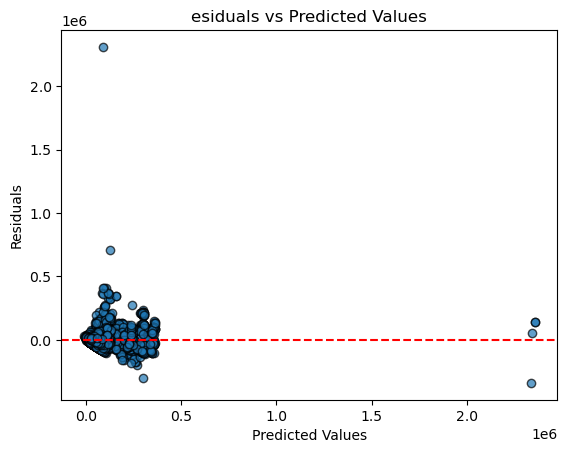

Check if the residuals are randomaly scatteres aroubd 0. Non-random patterns indicate non-linearity
2. Independence of Errors (Durbin-Waston Test):

Durin-Waston statistic: 1.9871561429522584
Residuals appear to be independent (No autocorrelation).

3. Homoscedasticity (Breusch-Pagan Test): 

Lagrange Multiplier Staistic: 129.56309839209436
p-value: 1.9697330785564916e-05
Residuals do not ave constant variance (Heteroscedasticity). Consider GLS or transformation.

4. Normality of Errors:



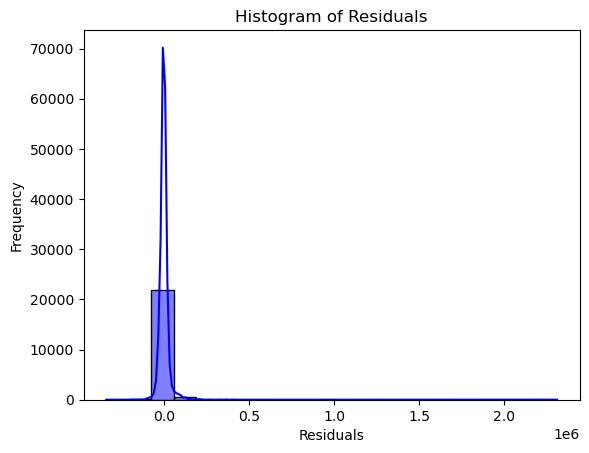

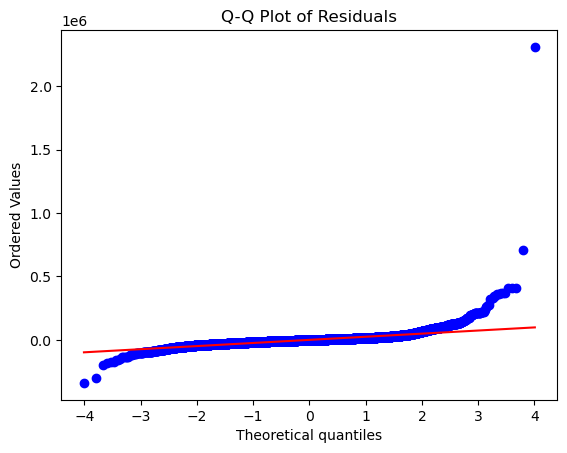

C:\Users\User\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 22514.
  res = hypotest_fun_out(*samples, **kwds)


Shapiro-Wilk Test p-value: 2.826596660797044e-113
Residuals are not normally distributed. Consider transformation or robust regression.

5. Multicollinearity (Variance Inflation Factor): 



C:\Users\User\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


             Feature       VIF
0         model_year  1.187395
1   miles_per_gallon  1.690856
2    premium_version  1.321688
3     collection_car  1.530893
4           (Acura,)       inf
..               ...       ...
65         (Pickup,)       inf
66            (SUV,)       inf
67          (Sedan,)       inf
68            (Van,)       inf
69          (Wagon,)       inf

[70 rows x 2 columns]
High multicollinearity detected. Consider removing or combining highly correlated variables.



In [50]:
test_linear_regression_assumptions(x_train, y_train, x_df)